In [85]:
# Number 1: Import anything you need for the lower cells, and set any defaults (I’ll run once)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="whitegrid")
df = sns.load_dataset('titanic') 
df.info()

sns.set_color_codes("dark") # Setting the color for graph
sns.set_context("poster")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


Text(0.5, 0, 'Frequency of Missing Data')

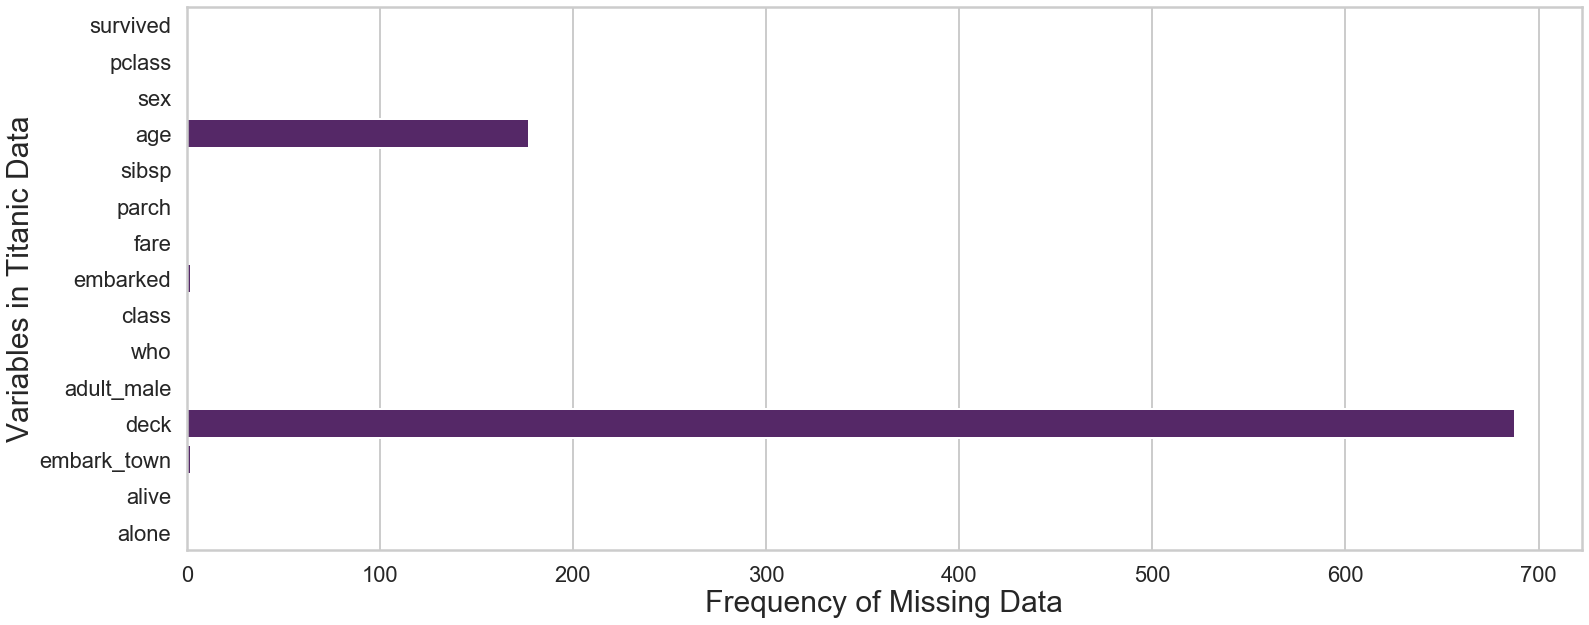

In [86]:
# Number 2a: Determine how much missing data there is for each variable, plotting it as a horizontal bar plot with seaborn

missingdata = df.isna().sum() # Calculating the number of NAs in the dataset by variable

print(missingdata) # Inspecting the table

plt.figure(figsize=(25,10)), # Setting the size of the figure

g =sns.barplot(x = missingdata.values, # Indicating the parameter for the x axis
                y=missingdata.index, # Indicating the parameter for the y axis
                color = "m") # Defining the color to use

g.set_ylabel('Variables in Titanic Data', fontsize = 30) # Setting a label and fontsize for the y axis

g.set_xlabel('Frequency of Missing Data', fontsize = 30) # Setting a label and fontsize for the x axis

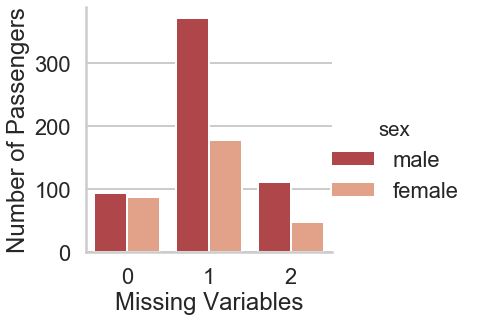

In [87]:
# Number 2b: Determine how much missing data there is for each variable, plotting it as a horizontal bar plot with seaborn

test = df.isna().sum(axis=1)

missingdata_b = pd.DataFrame({"missingdata_b": test, "sex": df.sex})

sns.set_palette("RdBu")

g2 = sns.catplot("missingdata_b", 
                  hue="sex",
                  data=missingdata_b,
                  kind="count") 

g2.set_axis_labels(x_var="Missing Variables", y_var="Number of Passengers")

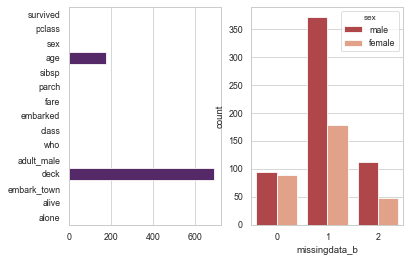

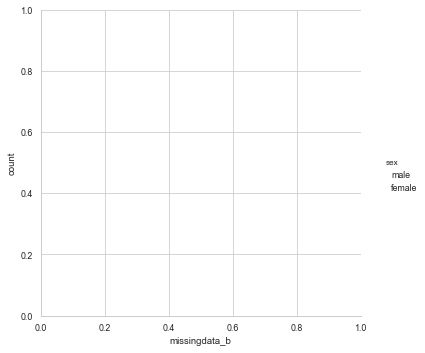

In [138]:
sns.set_context("paper")

figure, (g,g2) =plt.subplots(ncols =2, nrows=1)

g =sns.barplot(x = missingdata.values, 
                y=missingdata.index, 
                color = "m", ax=g) 


g2 = sns.catplot("missingdata_b", 
                  hue="sex",
                  data=missingdata_b,
                  kind="count", ax=g2)


<Figure size 144x72 with 0 Axes>

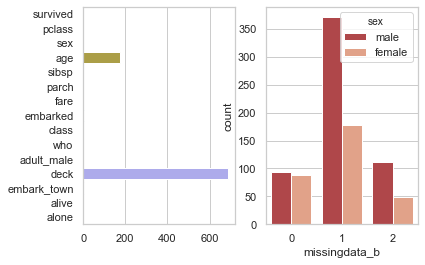

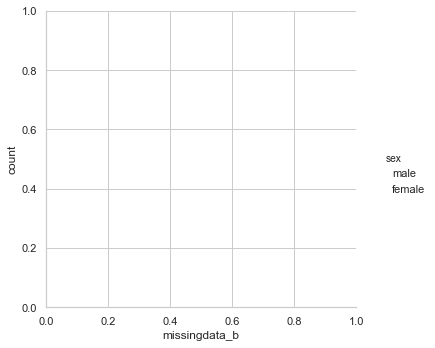

In [136]:
sns.set_context("notebook")
plt.figure(figsize=(2,1))
figure, (g,g2) =plt.subplots(ncols =2)
fig1 = sns.barplot(x=missingdata.values, y=missingdata.index, ax = g)
fig2 = sns.catplot("missingdata_b", 
                  hue="sex",
                  data=missingdata_b,
                  kind="count", ax = g2)